<a href="https://colab.research.google.com/github/ShivaniThalur/EDA-Hotel-Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Hotel_bookings_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hotel Bookings.csv')

In [ ]:
Hotel_bookings_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
Hotel_bookings_df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
Hotel_bookings_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5459,Resort Hotel,1,87,2016,April,18,29,2,5,2,...,Non Refund,71.0,NaN,0,Transient,46.0,0,0,Canceled,2016-03-01
3257,Resort Hotel,1,32,2015,November,48,27,0,2,2,...,No Deposit,240.0,NaN,0,Transient,48.0,0,2,Canceled,2015-11-11
942,Resort Hotel,0,52,2015,August,32,7,1,2,2,...,No Deposit,250.0,NaN,0,Transient,173.0,0,1,Check-Out,2015-08-10
101018,City Hotel,0,22,2016,November,45,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,111.0,1,2,Check-Out,2016-11-05
62432,City Hotel,1,9,2017,January,2,13,2,2,2,...,No Deposit,9.0,NaN,0,Transient,83.3,0,0,Canceled,2017-01-06


# **To start with the data cleaning.**

In [ ]:
Hotel_bookings_df.shape

(119390, 32)

In [ ]:
Hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# let's find out if any of the columns have any Null or missing values 

In [ ]:
Hotel_bookings_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

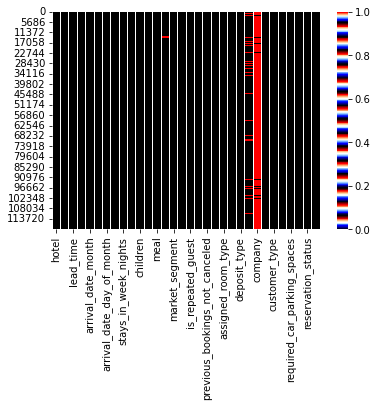

In [ ]:
import matplotlib.pyplot as plt
figsize=(15,5)
sns.heatmap(Hotel_bookings_df.isna(), cmap="flag_r")
plt.show()

There are null values in the following columns:
1. Children
2. Country
3. Agent
4. Company

# **Now replace those with values and integers**


In [ ]:
Hotel_bookings_df['children'].fillna(0,inplace=True)
Hotel_bookings_df['country'].fillna('ABC',inplace=True)
Hotel_bookings_df['agent']=Hotel_bookings_df.agent.fillna('0').apply
Hotel_bookings_df['company'].fillna('XYZ',inplace=True)
Hotel_bookings_df['children'] = Hotel_bookings_df['children'].astype(int)

In [ ]:
Hotel_bookings_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
Hotel_bookings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
Hotel_bookings_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,1,353,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,<bound method Series.apply of 0 0\...,XYZ,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,119390,112593,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,NaN,NaN,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,NaN,NaN,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,NaN,NaN,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,NaN,NaN,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,NaN,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
Hotel_bookings_df.describe(include='O').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
agent,119390,1,<bound method Series.apply of 0 0\...,119390


In [ ]:
Hotel_bookings_df.shape

(119390, 32)

In [ ]:
Hotel_bookings_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Now Creating a copy of DF so that orignal one is not affected

In [ ]:
Hotel_df = Hotel_bookings_df.copy()

# Total guests for each booking

In [ ]:
Hotel_df['Total_Guest'] = (Hotel_df["adults"] + Hotel_df["children"])
Hotel_df['Total_Guest']

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: Total_Guest, Length: 119390, dtype: int64

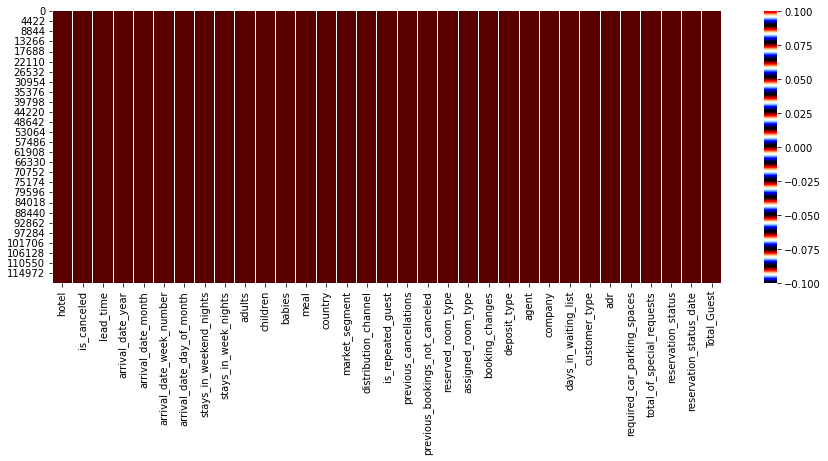

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(Hotel_df.isna(), cmap="flag_r")
plt.show()

#Zero guest rows are removed


In [ ]:
Hotel_df = Hotel_df[Hotel_df.Total_Guest>0]

In [ ]:
Hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
Hotel_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guest
78130,City Hotel,0,12,2015,October,41,4,1,0,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient-Party,72.0,0,0,Check-Out,2015-10-05,2
64724,City Hotel,1,92,2017,March,11,15,0,3,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,85.0,0,0,Canceled,2016-12-13,2
81988,City Hotel,1,115,2016,March,13,20,2,0,1,...,<bound method Series.apply of 0 0\...,XYZ,22,Transient,70.0,0,0,Canceled,2015-12-18,1
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient-Party,76.5,0,1,Canceled,2015-08-09,2
94803,City Hotel,0,189,2016,August,33,9,0,1,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,94.5,0,0,Check-Out,2016-08-10,2


# Separating and creating different datasets of both the hotel types.

In [ ]:
Hotel_df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
Resort_hotel_df= Hotel_df [Hotel_df.hotel == "Resort Hotel"]
Resort_hotel_df.sample(5)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guest
15606,Resort Hotel,0,26,2015,July,30,20,3,5,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,194.0,0,0,Check-Out,2015-07-28,2
30925,Resort Hotel,0,26,2016,December,50,4,2,2,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,50.0,0,0,Check-Out,2016-12-08,2
31186,Resort Hotel,0,3,2016,December,51,17,0,1,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient-Party,39.0,0,1,Check-Out,2016-12-18,2
38761,Resort Hotel,0,126,2017,July,29,22,2,5,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,200.0,0,1,Check-Out,2017-07-29,2
9495,Resort Hotel,1,183,2016,December,49,3,2,1,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,72.0,0,0,Canceled,2016-10-26,2


In [ ]:
City_hotel_df= Hotel_df [Hotel_df.hotel == "City Hotel"]
City_hotel_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guest
45388,City Hotel,0,72,2015,October,44,28,0,3,1,...,<bound method Series.apply of 0 0\...,XYZ,58,Transient-Party,75.33,0,0,Check-Out,2015-10-31,1
96706,City Hotel,0,61,2016,September,36,3,2,2,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,115.25,1,1,Check-Out,2016-09-07,2
46229,City Hotel,0,8,2015,December,52,26,2,3,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,77.35,0,1,Check-Out,2015-12-31,2
40807,City Hotel,0,1,2015,August,32,7,2,2,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Contract,90.00,0,2,Check-Out,2015-08-11,2
93713,City Hotel,0,64,2016,July,31,25,1,0,2,...,<bound method Series.apply of 0 0\...,XYZ,0,Transient,94.50,0,0,Check-Out,2016-07-26,2


#Exploratory Analysis and Visualization



In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Visualizing types of Stay available


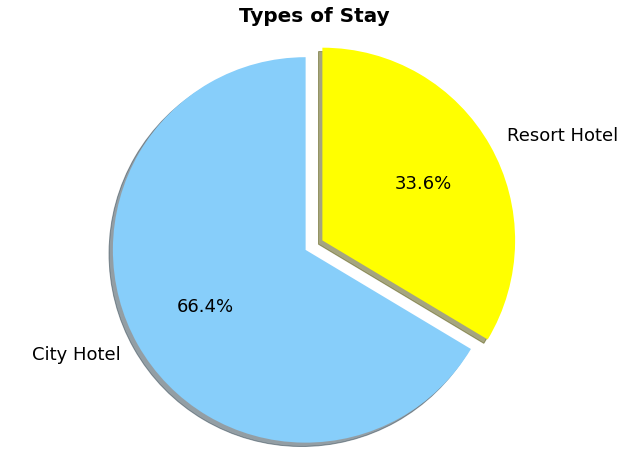

In [ ]:
Stay= Hotel_df['hotel'].value_counts()
plt.rcParams['figure.figsize']=[11,8]
mycolors =  ['lightskyblue','yellow']
plt.pie(Stay, explode=(0, 0.1), labels = Stay.index , colors=mycolors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 18}, shadow=True)
plt.title('Types of Stay',size=20, fontweight="bold")
plt.axis('equal')
plt.show()

There are two types of stay options 
1. City Hotel - This covers major part 
2. Resort Hotel -It has lesser number 

### 2.  Visualizing  yearly bookings hotel wise

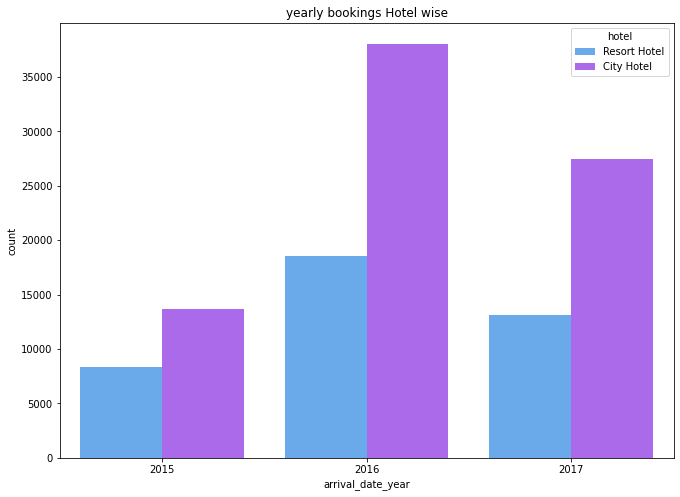

In [ ]:
sns.countplot(x= 'arrival_date_year',palette='cool', data= Hotel_df, hue= 'hotel').set_title ('yearly bookings Hotel wise')
#plt.rcParams['figure.figsize']=[11,8]
sns.set(rc = {'figure.figsize':(11,8)})

This graph clearly indicates that from year 2015 to 2017 booking of city hotel is greater than resort hotel booking.

# 3. Visualizing count of Guest based on the country.

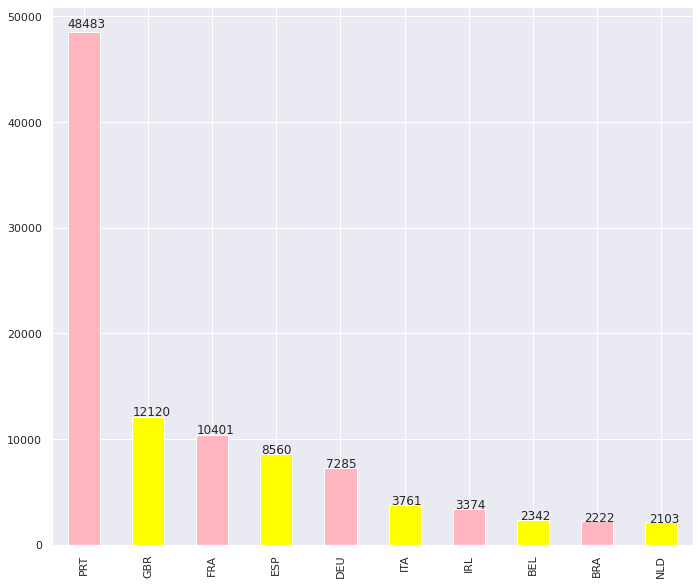

In [ ]:
plt.figure(figsize=(11.5,9.9))
mycolors =  ['lightpink','yellow']
most_guest=Hotel_df.country.value_counts().head(10).plot (kind= 'bar', color=mycolors);
for n in most_guest.patches:
   most_guest.annotate(str(n.get_height()),(n.get_x()*1.007,n.get_height()*1.009))


# 4. Visualizing proportion of booking cancellations 

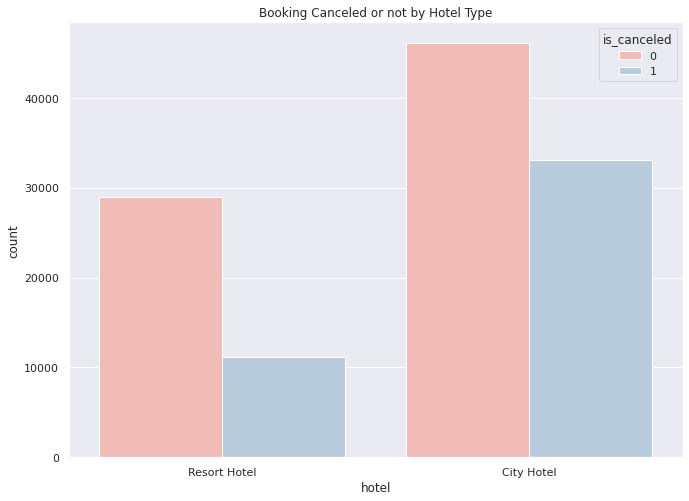

In [ ]:
booking_cancl =Hotel_df.groupby("hotel")["is_canceled"].describe()
sns.set(style = "darkgrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = Hotel_df, palette='Pastel1')
plt.rcParams["figure.figsize"] = (11,8.7)

### Inference : Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

# 5. Is the demand increasing over time?

<Figure size 842.4x595.44 with 0 Axes>

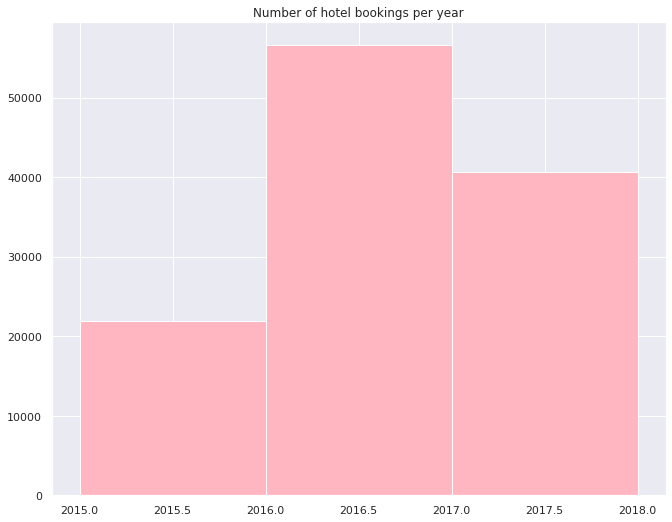

<Figure size 842.4x595.44 with 0 Axes>

In [ ]:
plt.title("Number of hotel bookings per year")
plt.hist(Hotel_df.arrival_date_year,bins=np.arange(2015, 2019, 1),color = "lightpink");
plt.figure(figsize = (11.7,8.27))

Booking increases in 2016 then decreases but can not say much in some of the year

# 6. Visualizing booking demand in a year

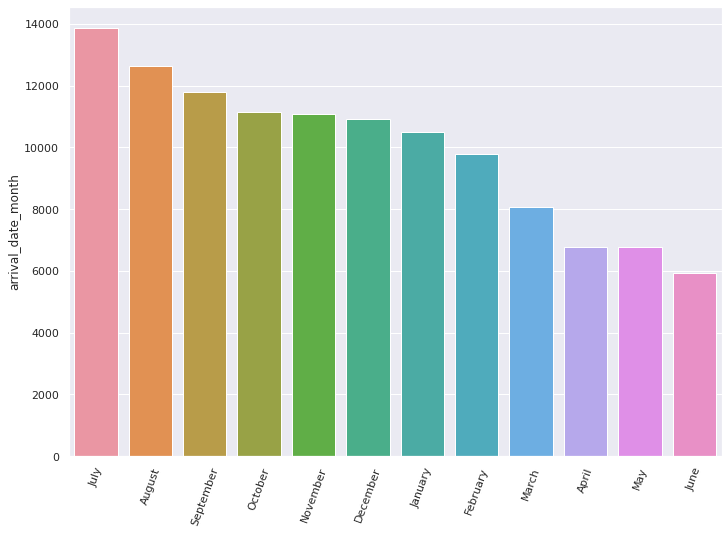

In [ ]:
sns.barplot(x = Hotel_df["arrival_date_month"].unique(), y = Hotel_df["arrival_date_month"].value_counts());
plt.xticks(rotation=70);
plt.gcf().set_size_inches(11.7, 8.27)

July is the most demanded year and June is the least demanded. So, June is the best time to go on holiday

# 7. Visualizing least demanded days to book hotel(June)

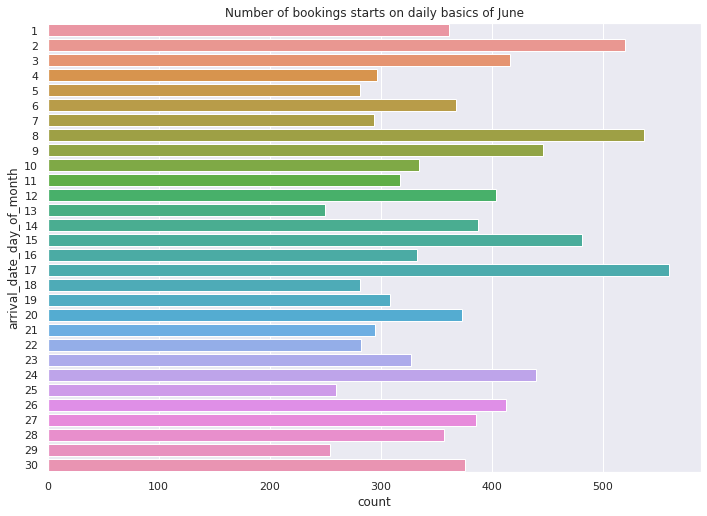

In [ ]:
June_month_df= Hotel_bookings_df[Hotel_bookings_df.arrival_date_month == "June"]
plt.title("Number of bookings starts on daily basics of June");
sns.countplot(y=June_month_df.arrival_date_day_of_month);
plt.gcf().set_size_inches(11.7, 8.27)

In this graph, It is cleat that mid June around 15th june max booking starts and least booking in second half of june. Hence, best time for booking is second half of June.

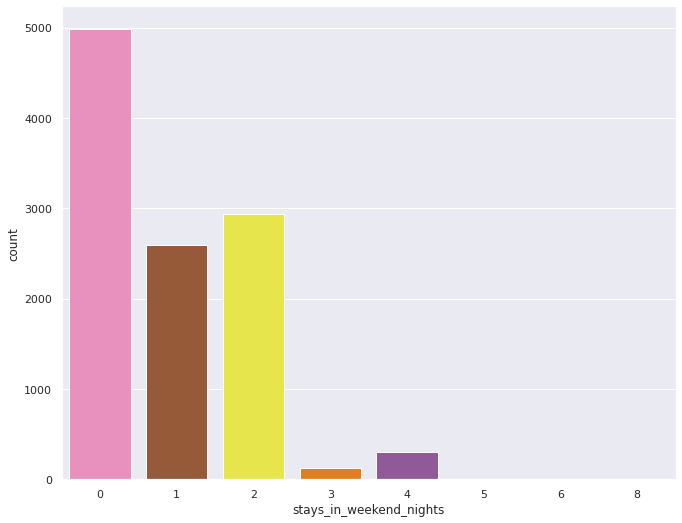

In [ ]:
Second_half_june_df=June_month_df[June_month_df.arrival_date_day_of_month>15]
sns.countplot(x=June_month_df.stays_in_weekend_nights,palette='Set1_r');

In the graph it clearly illustrates that second half of June weekends include more than half bookings.Hence,weekdays are the best time of booking

# 8. Visualizing monthly bookings and monthly cancellations

In [ ]:
df_copy= Hotel_df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.sample(100)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guest,no_of_bookings
103175,City Hotel,0,25,2016,December,50,10,2,2,2,...,XYZ,0,Transient,89.89,0,2,Check-Out,2016-12-14,2,0.500000
77404,City Hotel,0,19,2015,October,41,6,0,3,2,...,XYZ,0,Transient-Party,90.00,0,0,Check-Out,2015-10-09,2,0.500000
11814,Resort Hotel,1,411,2017,May,22,31,2,4,2,...,XYZ,0,Transient,71.10,0,0,Canceled,2016-04-15,2,0.500000
31547,Resort Hotel,0,66,2016,December,53,30,0,2,2,...,XYZ,0,Transient,175.00,0,1,Check-Out,2017-01-01,2,0.500000
90431,City Hotel,0,191,2016,June,23,3,1,2,2,...,XYZ,0,Transient-Party,132.00,0,0,Check-Out,2016-06-06,2,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10303,Resort Hotel,1,21,2017,February,8,25,2,1,2,...,XYZ,0,Transient,52.00,0,2,Canceled,2017-02-08,2,0.500000
17079,Resort Hotel,0,77,2015,September,38,17,2,6,2,...,XYZ,0,Contract,91.25,0,1,Check-Out,2015-09-25,2,0.500000
75816,City Hotel,1,330,2015,September,37,12,2,2,2,...,XYZ,0,Transient-Party,62.00,0,0,Canceled,2015-07-06,2,0.500000
26038,Resort Hotel,0,238,2016,July,29,12,2,5,2,...,XYZ,0,Transient,74.06,0,1,Check-Out,2016-07-19,2,0.333333


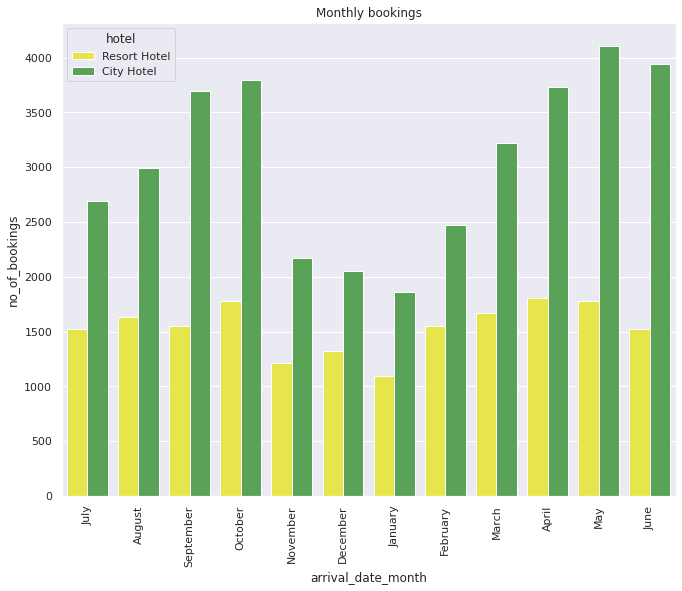

In [ ]:
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy,palette='Set1_r')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_copy1=Hotel_df.copy()
df_copy1['no_of_bookings']=1
df_copy1.loc[(df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy1.loc[~((df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy1.sample(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guest,no_of_bookings
61286,City Hotel,1,27,2016,December,50,7,0,3,2,...,XYZ,0,Transient,113.00,0,2,Canceled,2016-11-20,2,0.500000
2315,Resort Hotel,1,78,2015,October,41,9,1,2,2,...,XYZ,0,Transient,92.00,0,0,Canceled,2015-08-14,2,0.500000
54997,City Hotel,1,173,2016,August,32,2,0,2,2,...,XYZ,0,Transient,105.30,0,0,Canceled,2016-07-14,2,0.333333
38111,Resort Hotel,0,0,2017,July,27,8,0,1,2,...,XYZ,0,Transient,105.00,0,0,Check-Out,2017-07-09,2,0.333333
56018,City Hotel,1,187,2016,August,35,26,2,7,2,...,XYZ,0,Transient,84.72,0,0,Canceled,2016-08-22,2,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83993,City Hotel,0,36,2016,February,7,13,2,2,2,...,XYZ,0,Transient,78.30,0,1,Check-Out,2016-02-17,2,0.500000
82503,City Hotel,0,0,2017,April,13,1,1,1,1,...,163.0,0,Transient,50.00,0,1,Check-Out,2017-04-03,1,0.500000
64569,City Hotel,1,52,2017,March,11,13,1,1,1,...,XYZ,0,Transient,80.00,0,0,Canceled,2017-01-20,1,0.500000
25546,Resort Hotel,0,3,2016,June,25,18,4,10,2,...,XYZ,0,Contract,94.00,0,0,Check-Out,2016-07-02,2,0.500000


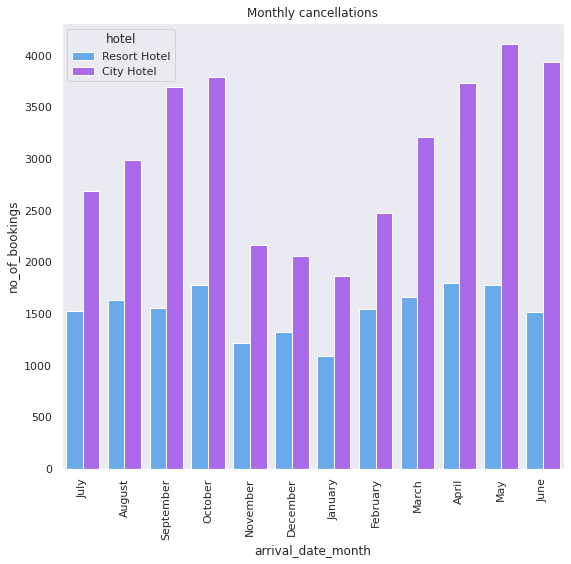

In [ ]:
plt.rcParams["figure.figsize"] = (9,8.2)
sns.set(style="dark")
plt.title("Monthly cancellations")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy1['hotel'], estimator= sum, data= df_copy1,palette='cool')
plt.xticks(rotation = 90)
plt.show()


# 9. Visualizing deposits type 

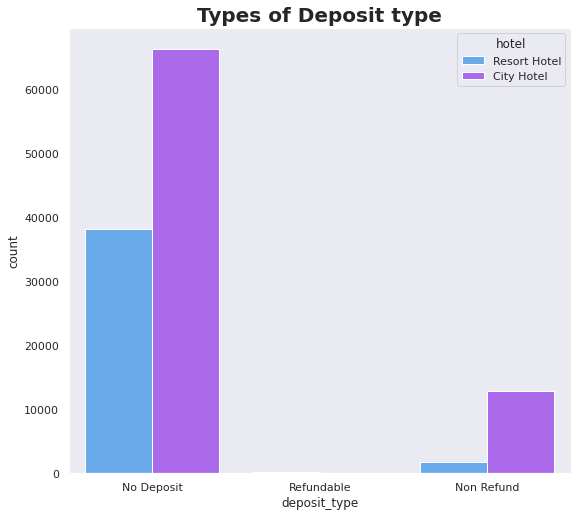

In [ ]:
sns.countplot(data = Hotel_df, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)

plt.show()

# **Asking and Answering Questions** 

# Q1. Which type of Hotel is preferred by each type of customers?

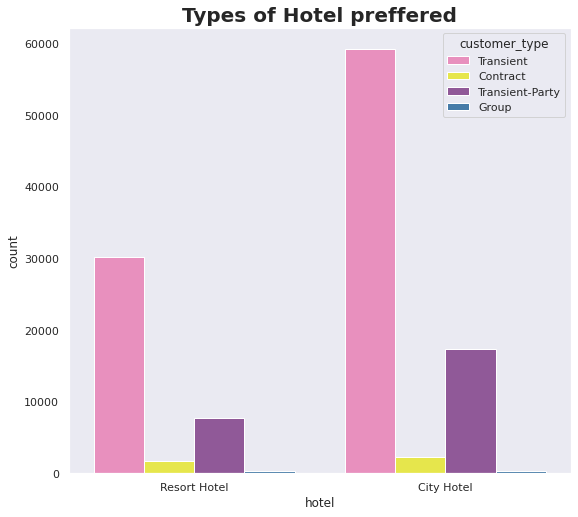

In [ ]:
sns.countplot(x= 'hotel', data= Hotel_df, hue= 'customer_type', palette='Set1_r')
plt.title('Types of Hotel preffered',fontweight="bold", size=20)

plt.show()

Conclusion: According to graph City hotel is most preffered by all types of customer.

#  Q2: What are most occupied and least occupied months?

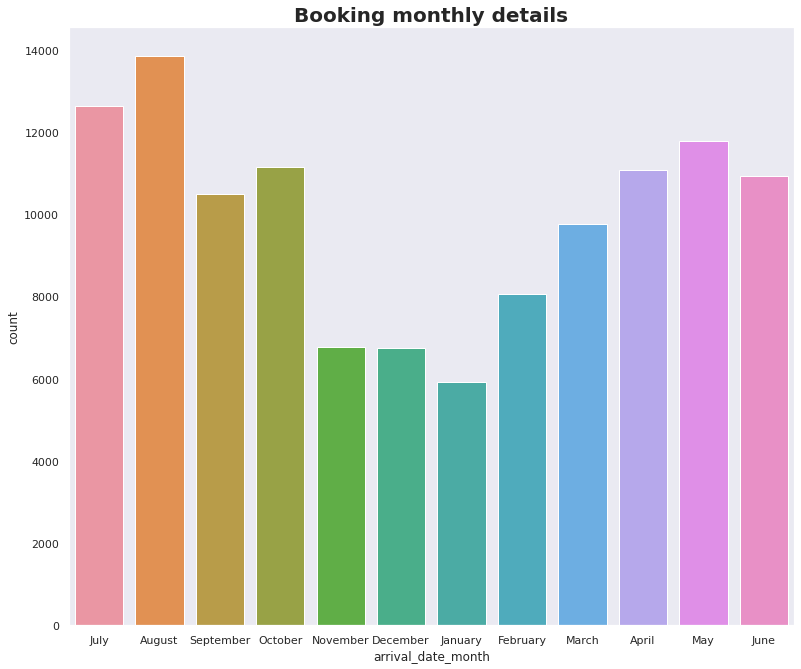

In [ ]:
plt.figure(figsize=(13,11))
plt.title("Booking monthly details",fontweight="bold",size=20)
sns.countplot(x= Hotel_df.arrival_date_month, data=Hotel_df)
plt.show()

In [ ]:
Hotel_df.arrival_date_month.value_counts(normalize=True)

August       0.116274
July         0.106065
May          0.098817
October      0.093507
April        0.092928
June         0.091679
September    0.088080
March        0.081939
February     0.067545
November     0.056799
December     0.056698
January      0.049669
Name: arrival_date_month, dtype: float64

Conclusion: As shown above , August is most occupied month with 11.64% booking and January is the least 4.94% bookings.

# Q3: How lead time affects the cancellation? 

(array([21764.,  9211.,  6947.,  6734.,  5486.,  4954.,  4657.,  4131.,
         3932.,  3717.,  3438.,  3315.,  2713.,  2791.,  2563.,  2845.,
         2701.,  2360.,  2433.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <a list of 19 Patch objects>)

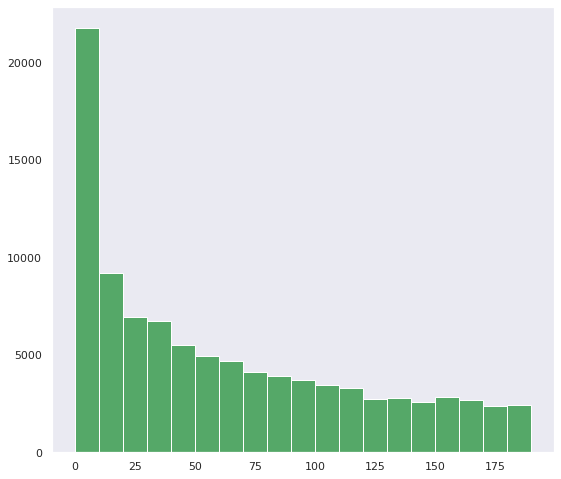

In [ ]:
plt.hist(Hotel_df.lead_time, bins=np.arange(0,200,10),color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


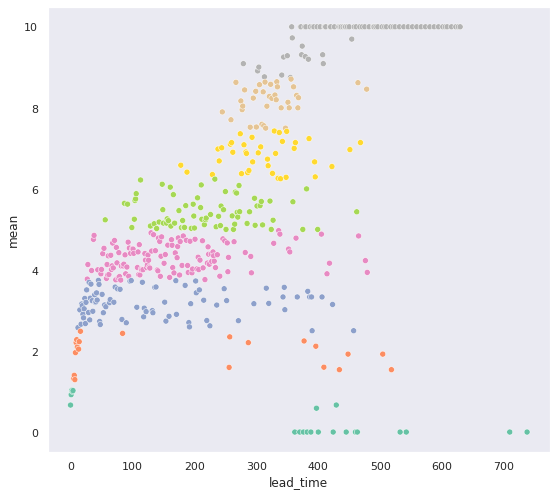

In [ ]:
lead= Hotel_df.groupby("lead_time")['is_canceled'].describe()
x=lead.index
y=lead["mean"] * 10
sns.scatterplot(x,y, c=y, cmap='Set2')

plt.show()

Conclusion: Lead time has a positive correlation with cancellation.It means if lead time increases than it lead to higher chances of cancellation. 

# Q4: Which months have cheaper booking rates?

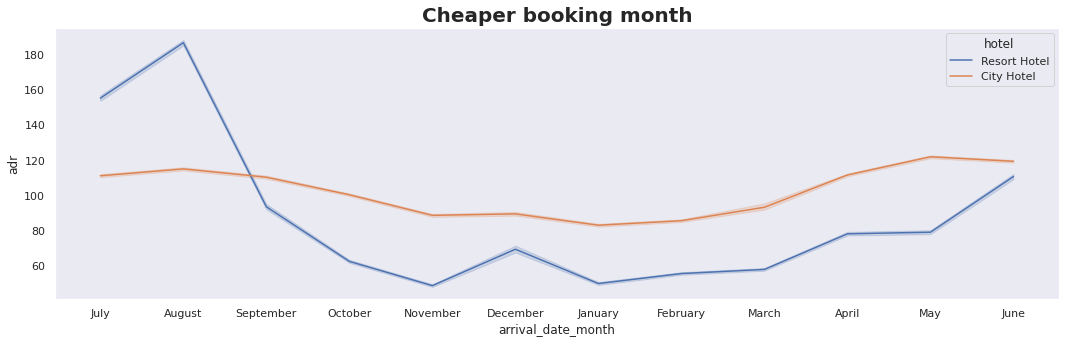

In [ ]:
plt.figure(figsize=(18,5))
plt.title("Cheaper booking month",size=20,fontweight="bold")
sns.lineplot(x='arrival_date_month', y='adr',hue='hotel', data= Hotel_df)
plt.show()

Conclusion: Nov to Jan have cheaper average daily rates in both city and resort hotels. Then rates starts to increasing.

# Q5: How many customers repeated their bookings ?

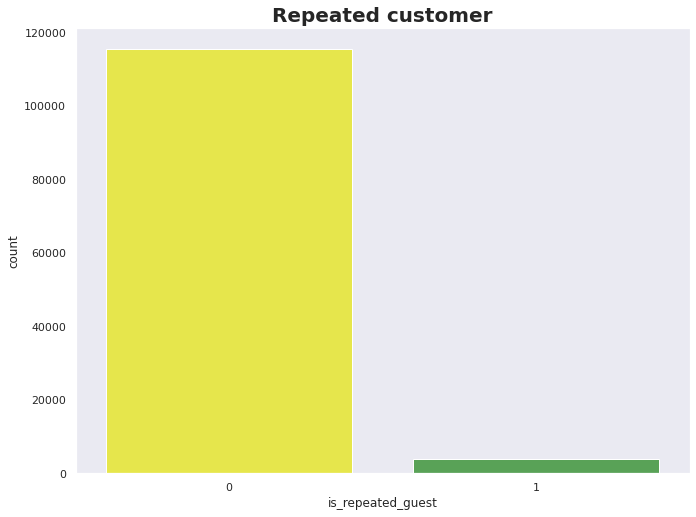

In [ ]:
plt.figure(figsize=(11,8.2))
plt.title("Repeated customer",size=20,fontweight="bold")
sns.countplot(x='is_repeated_guest', data=Hotel_df,palette='Set1_r')

Conclusion: The majority of customers are not repeating their bookings.



# Q6: How many families have children? 

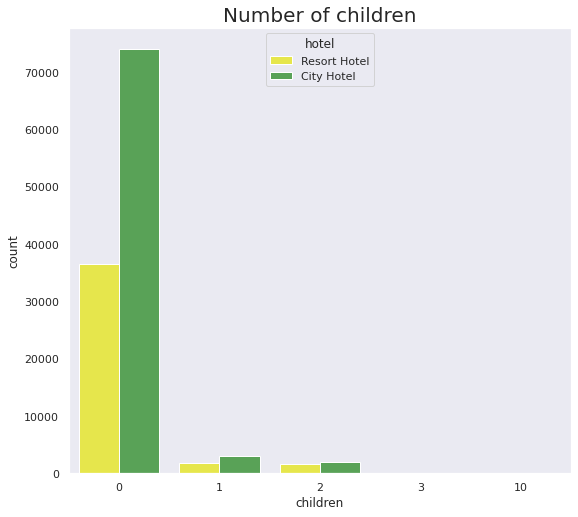

In [ ]:
plt.title("Number of children", fontsize = 20, )
sns.countplot(data = Hotel_df, x= 'children', hue = 'hotel', palette='Set1_r')
plt.show()

Conclusion: Most families have no children only few has 1 or 2 children.

# Q.7: How the number of guests have changed over the years? what is the busiest months overall ?

In [ ]:
not_cancel_df = Hotel_df[Hotel_df['is_canceled'] == 0]

bookings_count_df = pd.DataFrame(not_cancel_df.groupby(['arrival_date_year', 'arrival_date_month']).hotel.count())
bookings_count_df.reset_index(inplace = True)

total = bookings_count_df.pivot('arrival_date_year', 'arrival_date_month','hotel')

total = total.fillna(0)
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

total = total.reindex(columns = months)

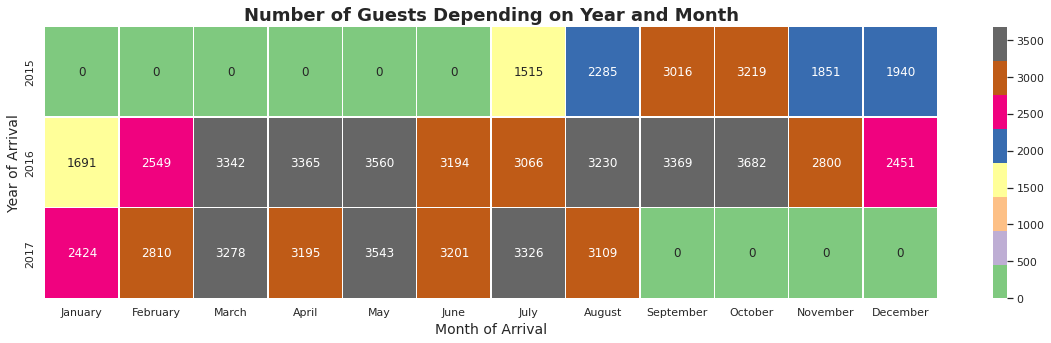

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(total, 
            annot = True, 
            fmt = "0.0f", 
            linewidths = .5, 
            cmap = 'Accent')
plt.xlabel('Month of Arrival', fontsize = 14)
plt.ylabel('Year of Arrival', fontsize = 14)
plt.title('Number of Guests Depending on Year and Month', fontsize = 18,fontweight="bold");

Conclusion: Highest booking year is 2016.And from the given data from 2015 to 2017.It shows that August has the highest number of bookings followed by July with second highest bookings . Overall,according to my observation May should have the most number of booking for this three years.

# Q.8: How is the price of hotels changes over the year?

Looking into prices per month per hotel 

average daily rate =  SumOfAllLodging/Transaction Total Number Of Staying Night 

average daily rate per person =  ADR/Adults+Children+babies

We will need to find out average daily rate per person

In [ ]:
Hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Total_Guest'],
      dtype='object')

In [ ]:
not_cancel_df['price_per_guest'] = not_cancel_df['adr']/(not_cancel_df['adults'] + not_cancel_df['children'] + not_cancel_df['babies'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
not_cancel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
import plotly.express as px
px.box(not_cancel_df, x = "arrival_date_year", y = "price_per_guest", color = "hotel")

Conclusion: It seeme that over the Years prices of city Hotel increases rapid that the resort hotel charges.

# Q.9: What are the types of meal provided? Which is the most ordered meal?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



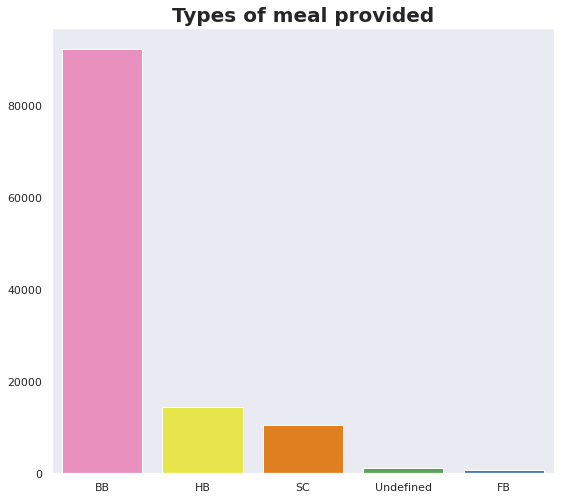

In [ ]:
x = Hotel_df.meal.value_counts().index    
y = Hotel_df['meal'].value_counts().to_list()    
plt.title("Types of meal provided",fontweight="bold", size=20)  
sns.barplot(x,y,palette='Set1_r') 
plt.show()

According to the given data there are categories in the meal column which means are as follow:

BB: Bed & Breakfast

HB:: Half board (breakfast and one other meal – usually dinner)

FB: Full board (breakfast, lunch and dinner)

Undefined/SC: no meal package

Bed & Breakfast is the most common option among the customers.

Inferences : Out of all BB  (Bed & Breakfast) have higher order followed by HB(Half
Board), SC(no meal package),
Undefined and FB (Full
Board).

# Q10: How meal affects the price per guest?

In [ ]:
px.box(not_cancel_df, x = "arrival_date_year", y = "price_per_guest", color = "meal")

Inferences: As shown, it clearly states that ordering meals rises the price for guest.

# Q11: Which countries have most visitors?

In [ ]:
country_counts = Hotel_df['country'].value_counts()
country_counts_df = pd.DataFrame({'Country' : country_counts.index, 
                                  'Count' : country_counts.values})

In [ ]:
import plotly.express as px 
px.choropleth(
    country_counts_df, 
    locations = 'Country',
    range_color=(0, 12),
    color = 'Count',     
    labels={'Count':'Number of Guests'}, 
    title = 'Home Country of Guests'
    )

Conclusion: Most of the visitors are from western europe, namely France,UK, Spain and Portugal being the highest.Around 38% of all bookings are from Portugal followed by
Great Britain(10%) & France(6%).

#Q12: Which type of customers have most cancellation?

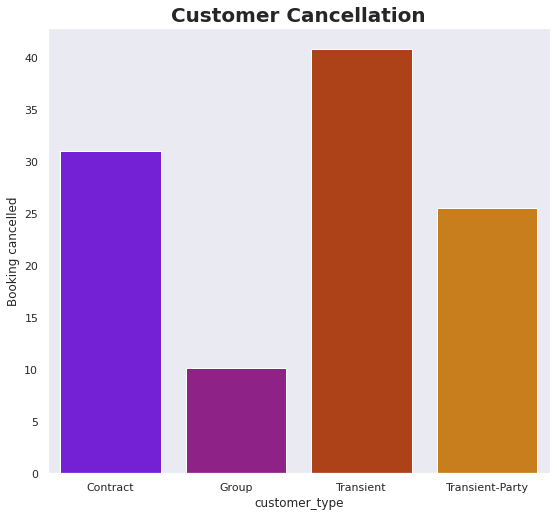

In [ ]:
Custyp= Hotel_df.groupby("customer_type")['is_canceled'].describe()

sns.barplot(x=Custyp.index, y=Custyp["mean"] * 100,palette='gnuplot')
plt.title("Customer Cancellation",size=20,fontweight="bold")
plt.ylabel("Booking cancelled")

plt.show()


Conclusion: Transient type of customers have most of the cancellation while groups have least cancellations whereas Contract and Transient-Party has lesser cancellation rates than Transient but Contract has exceed cancellation over Transient-Party.